A model for designing a rack and pinion system according to Ackermann Geometry 

Parameters: 
L = wheelbase 
B = distance between kingpins 
x = steering arm length 
y = tie-rod length 
p = rack casing length 
p + 2r = rack length 
d = rack position 
q = displacement of the rack while turning 
β = Ackermann Angle = atan(B/(2L)) 
δi = turning angle of inner wheel 
δo = turning angle of outer wheel 

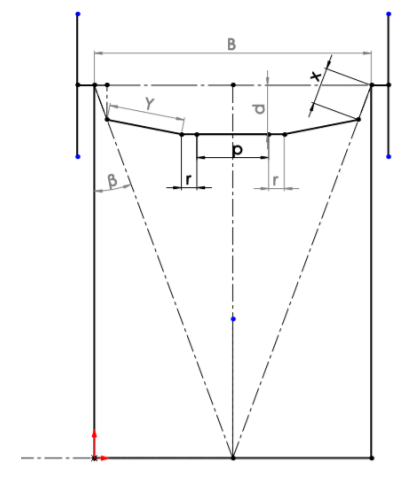

(A model for designing a rack and pinion system according to Ackermann Geometry)

The model analyzes the steering system by creating 3 equations based on its geometry. One for the system while driving straight forward and 2 for the inner and outer sides of the system while turning. 

Neutral Geometry 

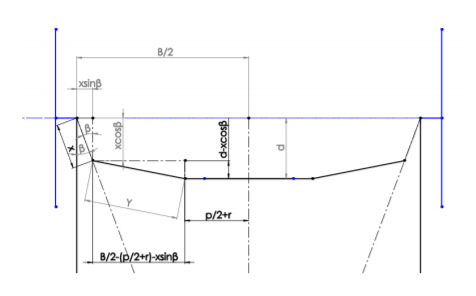

Equation 1: 

$ y^{2} = [\frac{B-(p+2r)}{2} -xsin(β)]^{2} + [d-xcos(β)]^{2}$

Inner Wheel Geometry (while turning) 

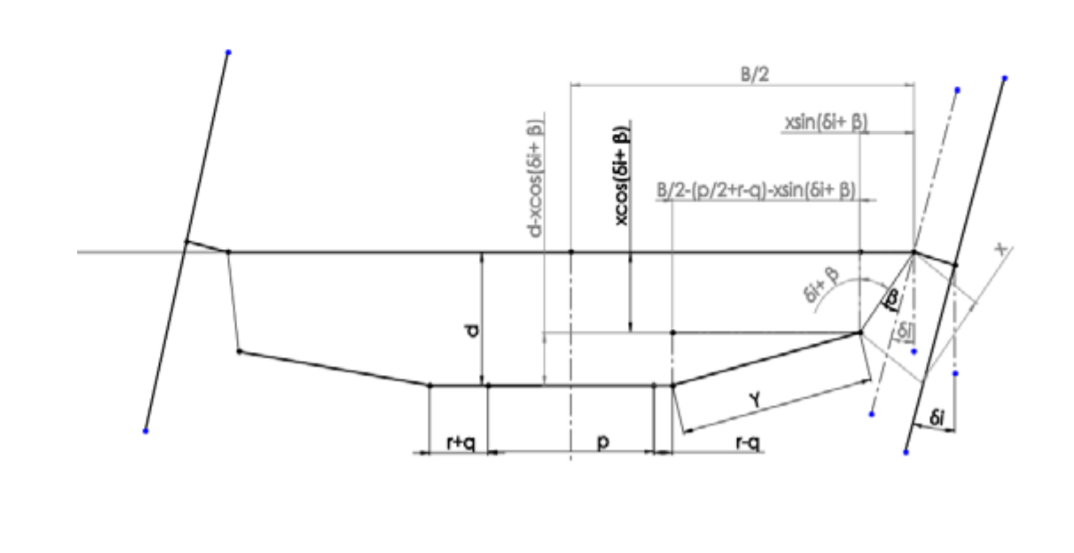

Equation 2: 

$ y^{2} = [\frac{B}{2}-(\frac{p}{2} + r - q) -xsin(δi+β)]^{2} + [d-xcos(δi+β)]^{2}$

Outer Wheel Geometry (while turning) 

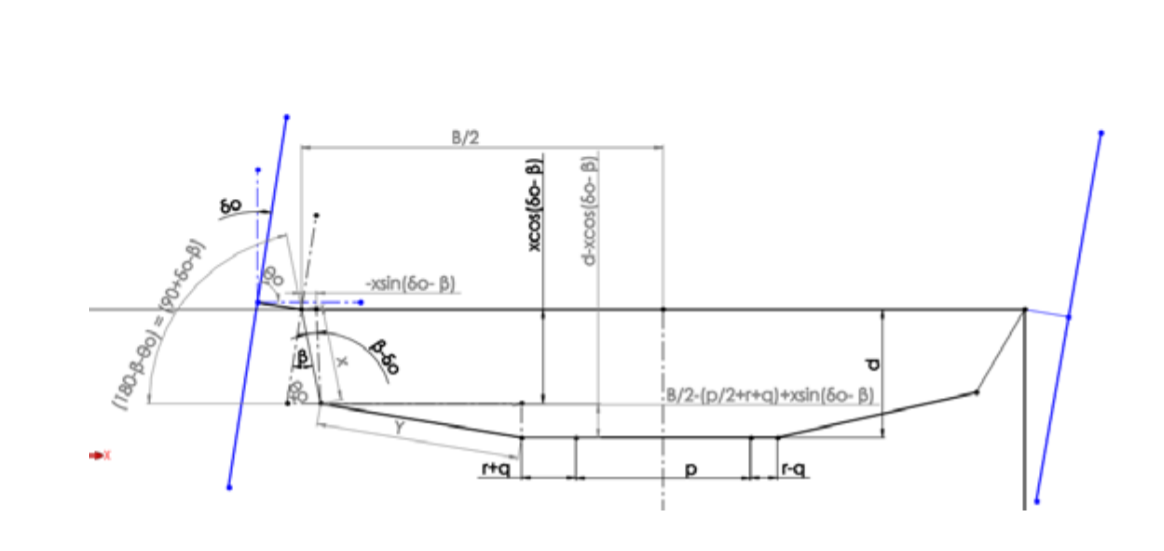

Equation 3:

$ y^{2} = [\frac{B}{2}-(\frac{p}{2} + r + q) -xsin(δo-β)]^{2} + [d-xcos(δo-β)]^{2}$

B,L, p, and r are all specified by the designer. Β is a function of B and L. δi and δo are determined by determined by Ackermann steering geometry for the desired turn radius. As such, there are only 4 unknowns in the 3 equations above: x, y, d, and q. Since there is one unknown too many, we must choose one of them to design a value for. Once that value is set, we can use the above system of 3 nonlinear equations to solve for the required dimensions of our steering system. 

 

Inner angle [δi] = 14.065 

Outer [δo] = 12.8871 

 

Reference: https://www.ijser.org/researchpaper/Mathematical-Model-to-Design-Rack-And-Pinion-Ackerman-Steering-Geomtery.pdf 

We will now demonstrate the python script to solve for steering arm length [x], tie-rod length [y], and rack position [d].

In [1]:
#Importing the necessary libraries 

from sympy import solve_poly_system
from sympy import cos, sin, atan
from sympy import symbols
import math

In [2]:
# Symbols to use for polynomial evaluation 
x,y,d= symbols('x y d')

In [3]:
# Parameters for Calculations 
L = 2432 #wheelbase
B = 717.3 #distance between kingpins
x= 325 #steering arm length
#y= 4 #tie-rod length
p= 152 #mm ; %rack casing length
r = 70 #mm
#(p + 2*r) = 292 #milimiters rack length
#d = 6 #%rack position
q = 111 #mm #%displacement of the rack while turning
beta= atan(B/(2*L)) #Ackermann Angle = atan(B/2L), returns values in rad
inner = 20 #turning angle of inner wheel
inner = math.radians(inner) # conversion of angle to rad
outter = 18  #turning angle of outter wheel
outter = math.radians(outter) # conversion of angle to rad

Equation 1: 

$ y^{2} = [\frac{B-(p+2r)}{2} -xsin(β)]^{2} + [d-xcos(β)]^{2}$



In [4]:
# Equation 1 
const1 = (B - p - (2 * r) )/2 
const2 = sin(beta)
const3 = cos(beta)

eq1 = ((const1 - (x*const2))**2) + ((d - (x*const3))**2) - (y**2)

# ((((B - p - (2 * r) )/2) - (x*sin(beta)))**2) + ((d-(x*cos(beta)))**2)

Equation 2: 

$ y^{2} = [\frac{B}{2}-(\frac{p}{2} + r - q) -xsin(δi+β)]^{2} + [d-xcos(δi+β)]^{2}$

In [5]:
# Equation 2 

const1 = ((B/2) - ((p/2) + r - q))
const2 = sin(inner + beta)
const3 = cos(inner + beta)

eq2 = ((const1 - (x*const2))**2) + ((d-(x*const3))**2) -(y**2)

#  ((((B/2) - ((p/2) + r - q)) - (x*sin(inner + beta)))**2) + ((d-(x*cos(inner + beta)))**2)

Equation 3:

$ y^{2} = [\frac{B}{2}-(\frac{p}{2} + r + q) -xsin(δo-β)]^{2} + [d-xcos(δo-β)]^{2}$

In [6]:
# Equation 3 

const1 = ((B/2) - ((p/2) + r + q))
const2 = sin(outter - beta)
const3 = cos(outter - beta)

eq3 = ((const1 - (x*const2))**2) + ((d-(x*const3))**2)- (y**2)


In [7]:
# Solve Polynomial Equations 
print(eq1)
print(eq2)
print(eq3)
ans = solve_poly_system([eq1,eq2,eq2],y,d)
print(ans)

-y**2 + 103376.786471226*(0.00311020121097919*d - 1)**2 + 27302.4961359775
-y**2 + 81747.6289480137*(0.00349753780503929*d - 1)**2 + 28603.9273279575
-y**2 + 102680.712319826*(0.00312072545637461*d - 1)**2 + 2245.6897588634


NoConvergence: convergence to root failed; try n < 15 or maxsteps > 50

No real convergence for all three equations. We will choose the value that has the closest value! 